<a href="https://colab.research.google.com/github/PerfectMach1ne/uni-ai-ml/blob/main/ProjektSSI_Trenowanie.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Projekt - Systemy sztucznej inteligencji
## Testowanie różnych modeli


#### Przygotowanie środowiska

In [ ]:
import os
from pathlib import Path

import numpy as np
import pandas as pd

current_path = Path(os.path.dirname(os.path.abspath("__file__")))

X = pd.read_csv(os.path.join(current_path,"X.csv"))
y = pd.read_csv(os.path.join(current_path,"y.csv"))

#### Podział na zbiór treningowy i testowy

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y)

print("Rozmiar zbioru X_train = ", X_train.shape)
print("Rozmiar zbioru X_test = ", X_test.shape)
print("Rozmiar zbioru y_train = ", y_train.shape)
print("Rozmiar zbioru y_test = ", y_test.shape)

Rozmiar zbioru X_train =  (800, 9)
Rozmiar zbioru X_test =  (200, 9)
Rozmiar zbioru y_train =  (800, 1)
Rozmiar zbioru y_test =  (200, 1)


### Decision Tree Classifier

[Text(0.5, 0.875, 'lunch_standard <= 0.5\ngini = 0.813\nsamples = 800\nvalue = [97, 131, 201, 171, 142, 58]\nclass = Ocena 3.5'),
 Text(0.25, 0.625, 'gender_male <= 0.5\ngini = 0.776\nsamples = 273\nvalue = [68, 59, 78, 46, 20, 2]\nclass = Ocena 3.5'),
 Text(0.125, 0.375, 'race/ethnicity_group E <= 0.5\ngini = 0.742\nsamples = 136\nvalue = [46, 22, 43, 16, 8, 1]\nclass = Ocena 2.0'),
 Text(0.0625, 0.125, 'gini = 0.718\nsamples = 114\nvalue = [43, 21, 35, 12, 2, 1]\nclass = Ocena 2.0'),
 Text(0.1875, 0.125, 'gini = 0.74\nsamples = 22\nvalue = [3, 1, 8, 4, 6, 0]\nclass = Ocena 3.5'),
 Text(0.375, 0.375, 'race/ethnicity_group B <= 0.5\ngini = 0.78\nsamples = 137\nvalue = [22, 37, 35, 30, 12, 1]\nclass = Ocena 3.0'),
 Text(0.3125, 0.125, 'gini = 0.779\nsamples = 108\nvalue = [16, 27, 32, 21, 11, 1]\nclass = Ocena 3.5'),
 Text(0.4375, 0.125, 'gini = 0.73\nsamples = 29\nvalue = [6, 10, 3, 9, 1, 0]\nclass = Ocena 3.0'),
 Text(0.75, 0.625, 'race/ethnicity_group E <= 0.5\ngini = 0.803\nsamples 

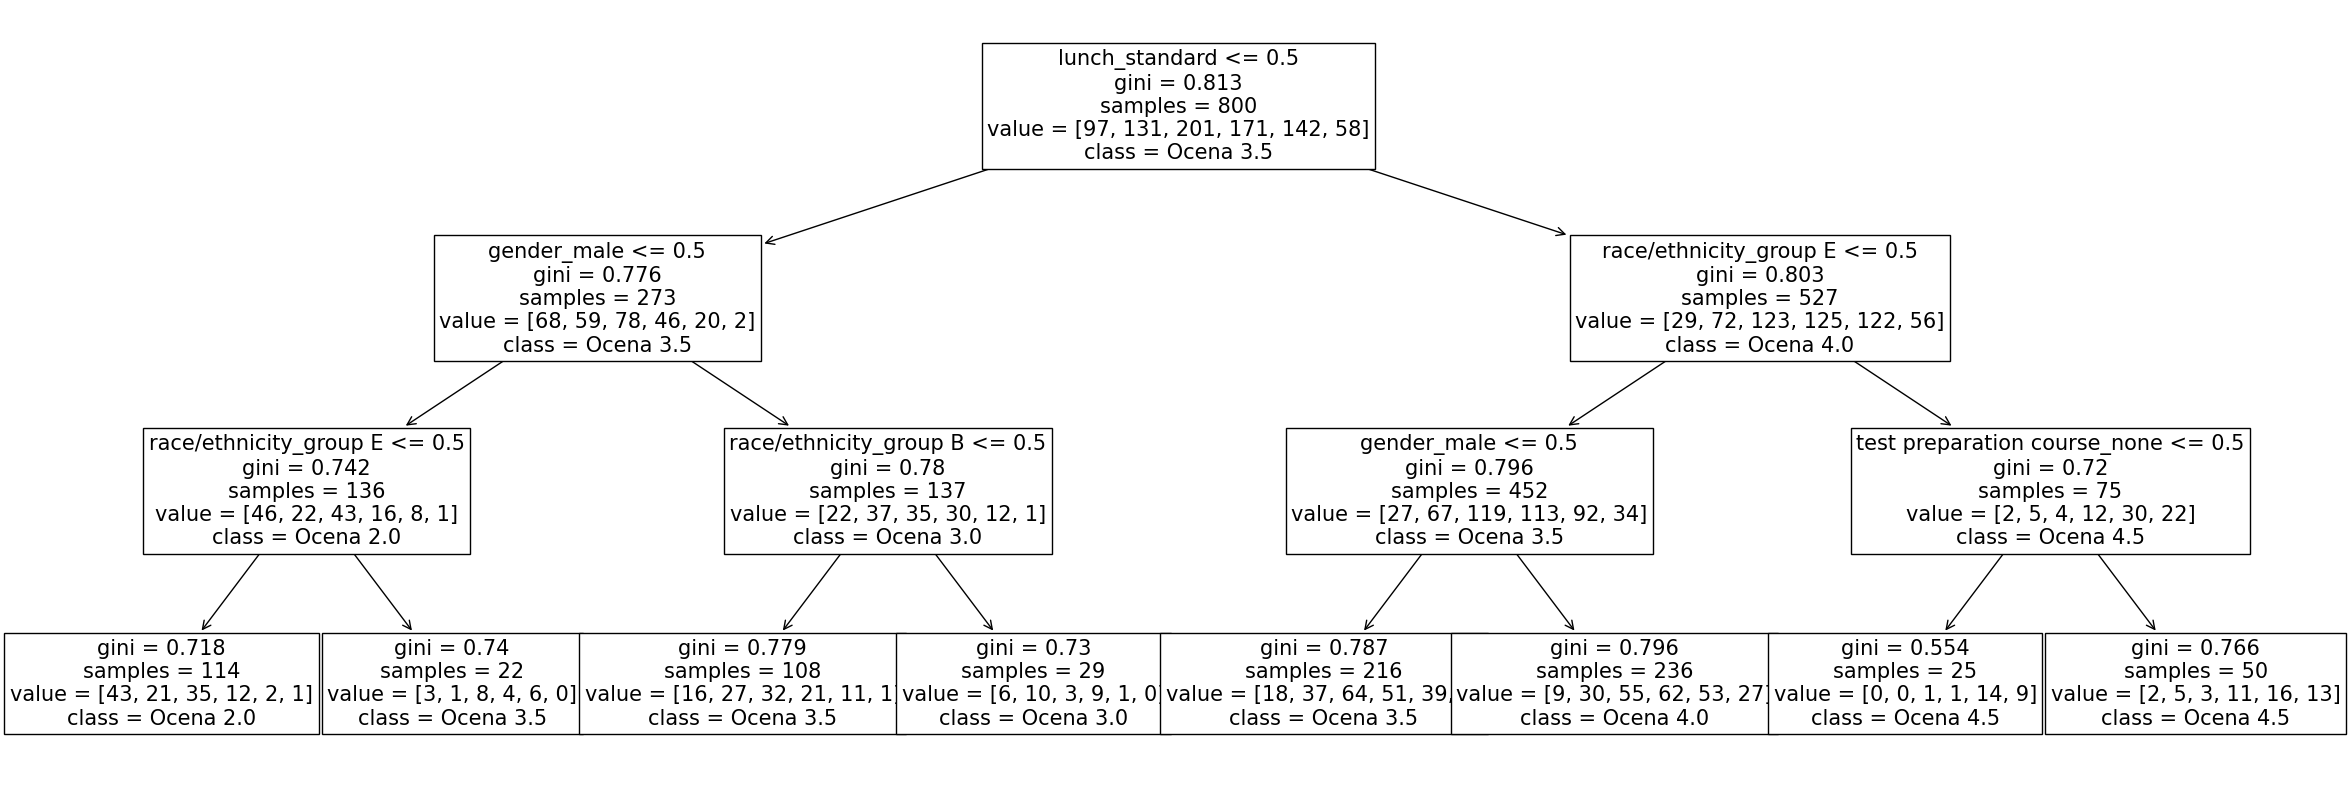

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from matplotlib import pyplot as plt

class_dt = DecisionTreeClassifier(max_depth=3)
class_dt.fit(X_train, y_train)

plt.figure(figsize=(30,10))
tree.plot_tree(class_dt,feature_names=X.columns, class_names=["Ocena 2.0", "Ocena 3.0", "Ocena 3.5", "Ocena 4.0", "Ocena 4.5", "Ocena 5.0"], fontsize=15)

In [ ]:
y_pred=class_dt.predict(X_test)
probas=class_dt.predict_proba(X_test)

In [ ]:
def create_results_df(X_test, y_test, y_pred, probas):
  results=X_test.copy()
  results["y_test_TI"]=y_test
  results["y_pred_TI"]=y_pred
  results["proba_TI"]=probas[:,1]
  return results

In [ ]:
results=create_results_df(X_test, y_test, y_pred, probas)
results.head(10)

,gender_male,race/ethnicity_group B,race/ethnicity_group C,race/ethnicity_group D,race/ethnicity_group E,parental level of education_high school,parental level of education_master's degree,lunch_standard,test preparation course_none,y_test_TI,y_pred_TI,proba_TI
172,0,0,0,0,0,1,0,1,0,Ocena 3.0,Ocena 3.5,0.171296
664,0,0,0,1,0,1,0,0,0,Ocena 4.0,Ocena 2.0,0.184211
33,0,0,0,1,0,0,1,0,1,Ocena 2.0,Ocena 2.0,0.184211
832,1,0,0,0,0,1,0,1,0,Ocena 5.0,Ocena 4.0,0.127119
85,1,0,0,1,0,0,1,1,1,Ocena 5.0,Ocena 4.0,0.127119
344,1,0,0,1,0,0,0,1,1,Ocena 5.0,Ocena 4.0,0.127119
963,1,1,0,0,0,1,0,1,1,Ocena 3.5,Ocena 4.0,0.127119
574,1,0,1,0,0,1,0,0,1,Ocena 4.0,Ocena 3.5,0.250000
918,1,0,0,1,0,0,0,0,1,Ocena 4.5,Ocena 3.5,0.250000
879,0,0,1,0,0,1,0,1,1,Ocena 3.0,Ocena 3.5,0.171296


#### Predykcja modelu i macierz pomyłek

In [ ]:
# for val in y_pred:
#   val = float(val[6:len(val)])

In [ ]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

In [ ]:
y_pred=class_dt.predict(X_test)
probas=class_dt.predict_proba(X_test)

In [ ]:
def create_results_df(X_test, y_test, y_pred, probas):
  results=X_test.copy()
  results["y_test_TI"]=y_test
  results["y_pred_TI"]=y_pred
  results["proba_TI"]=probas[:,1]
  return results

In [ ]:
results=create_results_df(X_test, y_test, y_pred, probas)
results.head(7)

,gender_male,race/ethnicity_group B,race/ethnicity_group C,race/ethnicity_group D,race/ethnicity_group E,parental level of education_high school,parental level of education_master's degree,lunch_standard,test preparation course_none,y_test_TI,y_pred_TI,proba_TI
172,0,0,0,0,0,1,0,1,0,Ocena 3.0,Ocena 3.5,0.171296
664,0,0,0,1,0,1,0,0,0,Ocena 4.0,Ocena 2.0,0.184211
33,0,0,0,1,0,0,1,0,1,Ocena 2.0,Ocena 2.0,0.184211
832,1,0,0,0,0,1,0,1,0,Ocena 5.0,Ocena 4.0,0.127119
85,1,0,0,1,0,0,1,1,1,Ocena 5.0,Ocena 4.0,0.127119
344,1,0,0,1,0,0,0,1,1,Ocena 5.0,Ocena 4.0,0.127119
963,1,1,0,0,0,1,0,1,1,Ocena 3.5,Ocena 4.0,0.127119


In [ ]:
cm=confusion_matrix(y_test, y_pred, labels=["Ocena 2.0", "Ocena 3.0", "Ocena 3.5", "Ocena 4.0", "Ocena 4.5", "Ocena 5.0"])
print("Confusion matrix")
print(cm)

Confusion matrix
[[ 8  1 10  5  0  0]
 [ 8  2 20  2  1  0]
 [10  2 26  9  3  0]
 [ 4  1 22 13  3  0]
 [ 0  0 14 13  9  0]
 [ 0  0  1  7  6  0]]


In [ ]:
import matplotlib.pyplot as plt
from sklearn import metrics

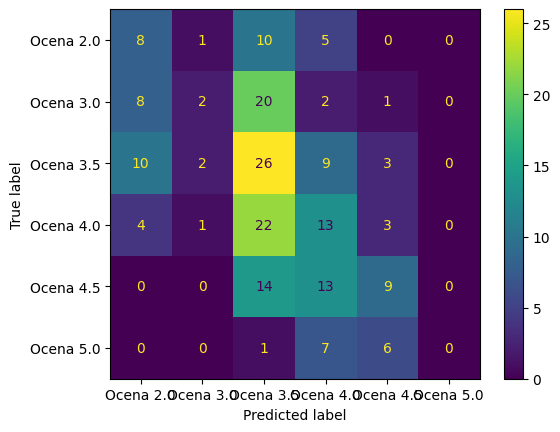

In [ ]:
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = cm, display_labels = ["Ocena 2.0", "Ocena 3.0", "Ocena 3.5", "Ocena 4.0", "Ocena 4.5", "Ocena 5.0"])
cm_display.plot()
plt.show()

In [ ]:
class_dt = DecisionTreeClassifier(max_depth=100)
class_dt.fit(X_train, y_train)

y_pred=class_dt.predict(X_test)
probas=class_dt.predict_proba(X_test)

cm=confusion_matrix(y_test, y_pred, labels=["Ocena 2.0", "Ocena 3.0", "Ocena 3.5", "Ocena 4.0", "Ocena 4.5", "Ocena 5.0"])
print("Confusion matrix")
print(cm)

Confusion matrix
[[10  3  5  4  1  1]
 [ 5  5 14  7  2  0]
 [ 7 10 18  5  8  2]
 [ 2  7 21  6  5  2]
 [ 0  3 15  7  3  8]
 [ 0  1  3  3  4  3]]


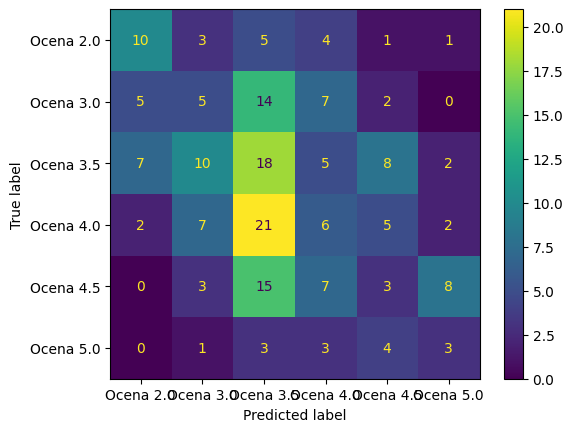

In [ ]:
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = cm, display_labels = ["Ocena 2.0", "Ocena 3.0", "Ocena 3.5", "Ocena 4.0", "Ocena 4.5", "Ocena 5.0"])
cm_display.plot()
plt.show()

In [ ]:
print("Metryki")
print(classification_report(y_test, y_pred, target_names=["Ocena 2.0", "Ocena 3.0", "Ocena 3.5", "Ocena 4.0", "Ocena 4.5", "Ocena 5.0"]))

Metryki
              precision    recall  f1-score   support

   Ocena 2.0       0.42      0.42      0.42        24
   Ocena 3.0       0.17      0.15      0.16        33
   Ocena 3.5       0.24      0.36      0.29        50
   Ocena 4.0       0.19      0.14      0.16        43
   Ocena 4.5       0.13      0.08      0.10        36
   Ocena 5.0       0.19      0.21      0.20        14

    accuracy                           0.23       200
   macro avg       0.22      0.23      0.22       200
weighted avg       0.21      0.23      0.21       200



## Klasyfikator SVM (Support Vector Machine)

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC

In [ ]:
scaler=StandardScaler()
scaler.fit(X_train)
X_train=scaler.transform(X_train)

X_test=scaler.transform(X_test)

In [ ]:
def train_and_test(classifier, X_train, y_train, X_test, y_test, column_names=None):
  classifier.fit(X_train, y_train)

  y_pred=classifier.predict(X_test)
  probas=classifier.predict_proba(X_test)

  if column_names is not None:
    X_test_df = pd.DataFrame(X_test, columns=column_names)
    results=create_results_df(X_test_df, y_test, y_pred, probas)
  else:
    results=create_results_df(X_test, y_test, y_pred, probas)

  print("Confusion matrix")
  print(confusion_matrix(y_test, y_pred, labels=["Ocena 2.0", "Ocena 3.0", "Ocena 3.5", "Ocena 4.0", "Ocena 4.5", "Ocena 5.0"]))

  print("Metryki")
  print(classification_report(y_test, y_pred, target_names=["Ocena 2.0", "Ocena 3.0", "Ocena 3.5", "Ocena 4.0", "Ocena 4.5", "Ocena 5.0"]))
  return results

In [ ]:
classifier = SVC(probability=True)
results=train_and_test(classifier, X_train, y_train, X_test, y_test, X.columns)

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Confusion matrix
[[ 7  2 11  4  0  0]
 [ 3  2 17  9  2  0]
 [ 4  5 30  2  9  0]
 [ 1  1 25  9  7  0]
 [ 0  0 14 11 10  1]
 [ 0  0  2  4  8  0]]
Metryki
              precision    recall  f1-score   support

   Ocena 2.0       0.47      0.29      0.36        24
   Ocena 3.0       0.20      0.06      0.09        33
   Ocena 3.5       0.30      0.60      0.40        50
   Ocena 4.0       0.23      0.21      0.22        43
   Ocena 4.5       0.28      0.28      0.28        36
   Ocena 5.0       0.00      0.00      0.00        14

    accuracy                           0.29       200
   macro avg       0.25      0.24      0.23       200
weighted avg       0.26      0.29      0.26       200



#### tSNE algorithm

In [ ]:
from sklearn.manifold import TSNE

In [ ]:
scaler = StandardScaler()
X_scal=scaler.fit_transform(X)

tsne = TSNE(n_components=2)
tsne_results = tsne.fit_transform(X_scal)

df_subset=pd.DataFrame()
df_subset['tsne-2d-one'] = tsne_results[:,0]
df_subset['tsne-2d-two'] = tsne_results[:,1]

<Axes: xlabel='tsne-2d-one', ylabel='tsne-2d-two'>

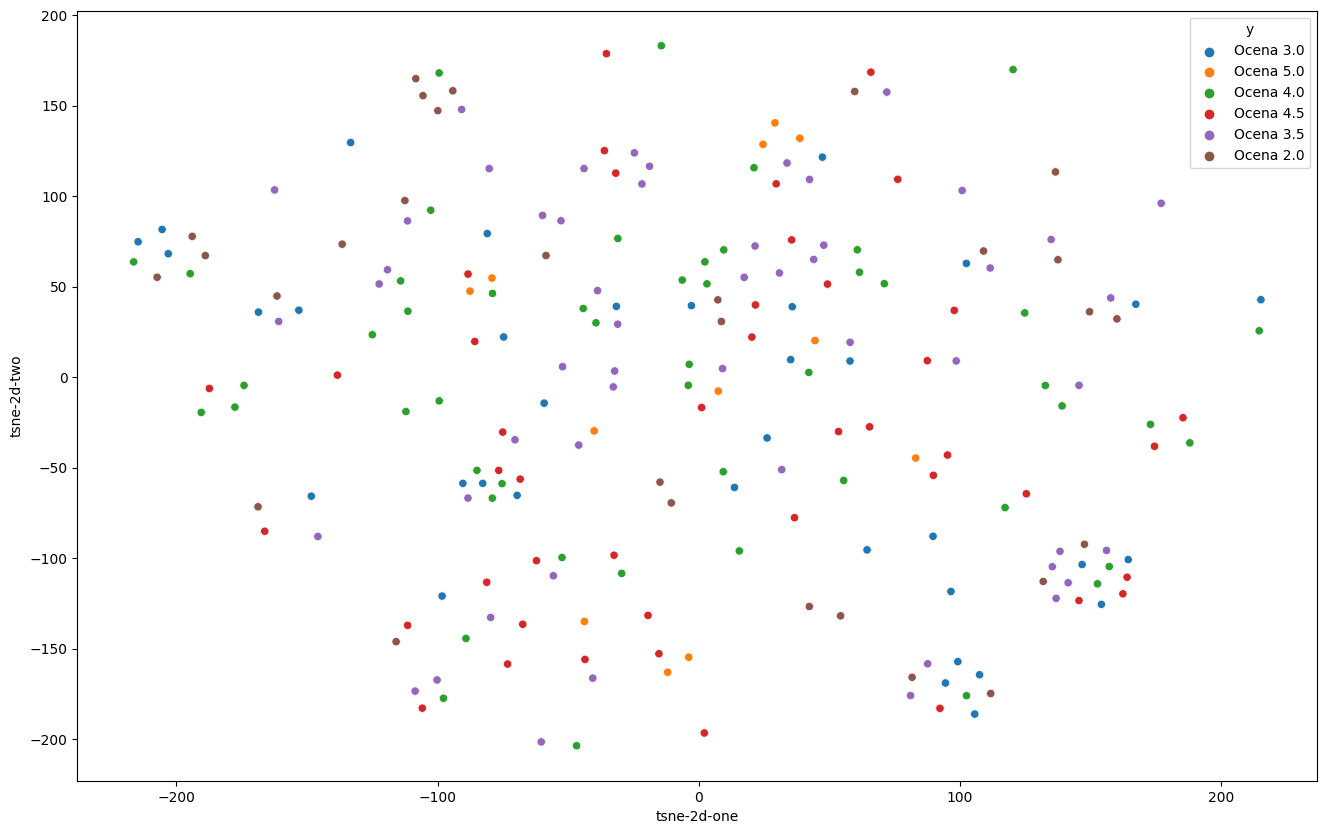

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

df_subset["y"]=y
plt.figure(figsize=(16,10))
sns.scatterplot(
    x="tsne-2d-one", y="tsne-2d-two",
    hue="y",
    data=df_subset,
    legend="full"
)

In [ ]:
scaler = StandardScaler()
X_scal=scaler.fit_transform(X)

tsne = TSNE(n_components=3)
tsne_results = tsne.fit_transform(X_scal)

df_subset=pd.DataFrame()
df_subset['tsne-2d-one'] = tsne_results[:,0]
df_subset['tsne-2d-two'] = tsne_results[:,1]
df_subset['tsne-2d-one'] = tsne_results[:,2]
df_subset['tsne-2d-two'] = tsne_results[:,3]

IndexError: ignored